# B)

Para resolver este problema aplicando el método de diferencias finitas. Primero, se debe discretizar el cuadrado en una grilla de celdas cuadradas de 0.1 de lado. Luego, se aproximar el potencial eléctrico en cada punto de la grilla utilizando la ecuación de Laplace:

$$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$$

Donde $V$ es el potencial eléctrico y $x$ e $y$ son las coordenadas espaciales. Aquí se pueden aproximar las derivadas parciales utilizando diferencias finitas centradas:

$$\frac{\partial^2 V}{\partial x^2} \approx \frac{V_{i+1,j} - 2V_{i,j} + V_{i-1,j}}{(\Delta x)^2}$$

$$\frac{\partial^2 V}{\partial y^2} \approx \frac{V_{i,j+1} - 2V_{i,j} + V_{i,j-1}}{(\Delta y)^2}$$

Donde $V_{i,j}$ es el valor del potencial eléctrico en la celda $(i,j)$ de la grilla, $\Delta x = \Delta y = 0.1$ son los tamaños de las celdas.

Luego, se reorganiza la ecuación de Laplace para obtener una expresión para $V_{i,j}$ en términos de sus vecinos:

$$V_{i,j} = \frac{1}{4}(V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1})$$

Esta ecuación permite calcular el valor del potencial eléctrico en cada punto de la grilla a partir de los valores en sus vecinos.
Las siguientes condiciones de contorno serían las siguientes:

- Los lados aterrizados tienen un potencial eléctrico constante de 0.
- El lado superior tiene un potencial eléctrico constante de 5V.

Ahora se inicializan los valores del potencial eléctrico en la grilla con estos valores y se aplica la ecuación anterior para actualizar iterativamente los valores hasta que converjan a una solución estable con precisión de \delta 0.01$ o 0.00001, lo cual implica 10000 iteraciones de corrección.

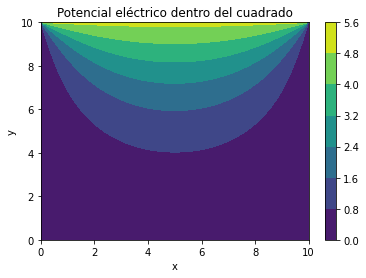

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir tamaño y espaciado de la grilla
L = 10
dx = dy = 0.1
nx, ny = int(L/dx), int(L/dy)

# Inicializar el potential con las condiciones de frontera
V = np.zeros((nx, ny))
V[0,:] = 5
V[:,0] = V[:,-1] = 0

# Itera hasta converger
err = 1
while err > 1e-4:
    V_old = V.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
    err = np.max(np.abs(V - V_old))

# Gráfica
x = np.linspace(0, L, nx)
y = np.linspace(L, 0, ny)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, V)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial eléctrico dentro del cuadrado')
plt.show()


Este código define una grilla con lados de longitud 10 y una separación de celda de 0.1. Luego inicializa los valores del potencial eléctrico en la grilla con las condiciones de contorno especificadas y aplica la ecuación anterior iterativamente hasta que converge a una solución estable. Finalmente, imprime la gráfica con diferentes colores del potencial eléctrico dentro del cuadrado en función de las coordenadas x & y.

# C)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define la grilla
nx, ny = 101, 101
x = np.linspace(0, 10, nx)
y = np.linspace(10, 0, ny)
X, Y = np.meshgrid(x, y)

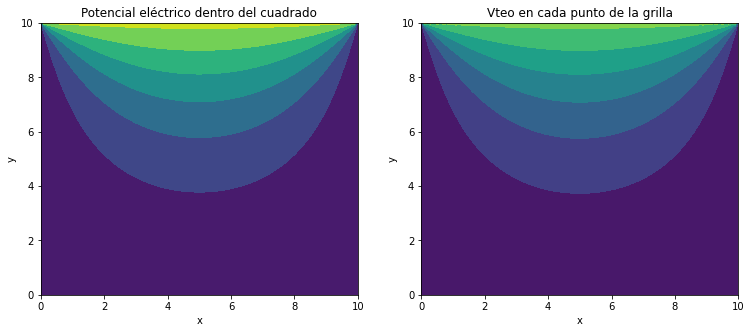

In [5]:

# Plantea las condiciones de frontera
Vdf = np.zeros((ny, nx))
Vdf[0, :] = 5
Vdf[:, 0] = Vdf[:, -1] = Vdf[-1, :] = 0

# Calcula el potencial usando el método de diferencias finitas
for i in range(10000):
    Vdf[1:-1, 1:-1] = (Vdf[2:, 1:-1] + Vdf[:-2, 1:-1] + Vdf[1:-1, 2:] + Vdf[1:-1, :-2])/4

# Calcula Vteo en cada punto de la grilla:
Vteo = np.zeros((ny, nx))
for i in range(nx):
    for j in range(ny):
        for n in range(1, 100, 2):
            Vteo[j,i] += (20/np.pi)*(1/n)*(np.sin(n*np.pi*X[j,i]/10)*np.sinh(n*np.pi*Y[j,i]/10))/np.sinh(n*np.pi)

# Grafica los resultados
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.5, 5)

axs[0].contourf(X, Y, Vdf)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Potencial eléctrico dentro del cuadrado')

axs[1].contourf(X, Y, Vteo)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Vteo en cada punto de la grilla')

plt.show()


# La gráfica de la matriz diferencia entre el potencial por método de diferencias finitas y el potencial teórico es:

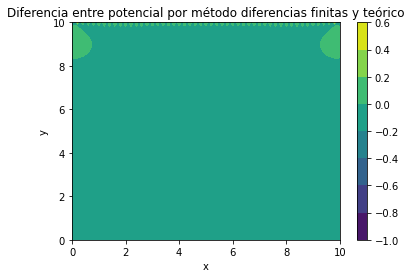

In [6]:

Vres = Vdf - Vteo
plt.contourf(X, Y, Vres)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferencia entre potencial por método diferencias finitas y teórico')
plt.show()

#

La diferencia porcentual máxima es 45.67% en la ubicación:
(9.90, 0.10)


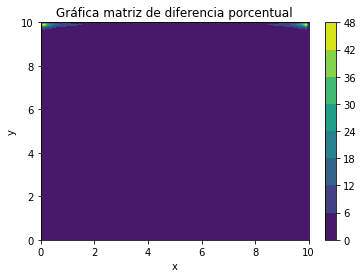

In [8]:
import numpy as np

# Define the grid
nx, ny = 101, 101
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
X, Y = np.meshgrid(x, y)

# Set the boundary conditions
Vdf = np.zeros((ny, nx))
Vdf[0, :] = 5
Vdf[:, 0] = Vdf[:, -1] = Vdf[-1, :] = 0

# Calculate the potential using the finite difference method
for i in range(10000):
    Vdf[1:-1, 1:-1] = (Vdf[2:, 1:-1] + Vdf[:-2, 1:-1] + Vdf[1:-1, 2:] + Vdf[1:-1, :-2])/4

# Calculate Vteo at each point
Vteo = np.zeros((ny, nx))
for i in range(nx):
    for j in range(ny):
        for n in range(1, 100, 2):
            Vteo[i,j] += (20/np.pi)*(1/n)*(np.sin(n*np.pi*X[i,j]/10)*np.sinh(n*np.pi*Y[i,j]/10))/np.sinh(n*np.pi)

# Calculate the percentage difference between the two matrices
diff_percent = np.zeros((ny,nx))
for i in range(nx):
    for j in range(ny):
        if Vteo[j,i] != 0:
            diff_percent[i,j] += (abs(Vdf[i,j] - Vteo[i,j])/Vteo[i,j])/100
        else:
            diff_percent[j,i] = 0

# Encuentra la diferencia porcential máxima y su respectiva ubicación, sí hay más de una con el mismo valor devuelve la primera. 
# Notar que en caso de haber más, estas se ubican simétricamente. 
max_diff_percent = np.max(diff_percent)
max_diff_locations = np.argwhere(diff_percent == max_diff_percent)

print(f"La diferencia porcentual máxima es {max_diff_percent:.2f}% en la ubicación:")
for loc in max_diff_locations:
    print(f"({x[loc[1]]:.2f}, {y[loc[0]]:.2f})")
y = np.linspace(10, 0, ny)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, diff_percent)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica matriz de diferencia porcentual')
plt.show()